In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dftr=pd.read_csv('train_local.csv')
dftr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            124
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          484
Embarked         3
dtype: int64

<AxesSubplot:>

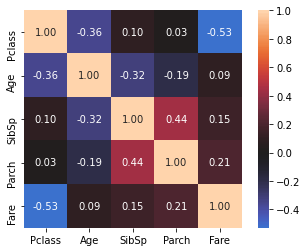

In [30]:
dftr2=dftr.drop('PassengerId',axis=1)
cor=dftr2.corr()
# 属性间相关系数热力图
sns.heatmap(cor, 
cbar=True, annot=True, # 注入数字
                 square=True, # 单元格为正方形
                 fmt='.2f',   # 字符串格式代码
                  annot_kws={'size': 10}, # 当annot为True时，ax.text的关键字参数，即注入数字的字体大小
           center=0)

In [4]:
dftt=pd.read_csv('test_local.csv')
dftt.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             53
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          203
Embarked         1
dtype: int64

In [5]:
df = pd.read_csv('test.csv')
df.isnull().sum()
#关系age和cabin的缺失值

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
#Fare缺失值较少直接用同Embarker同Pclass中位数补全
df[df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [7]:
dffare=df[(df['Pclass']==3) & (df['Embarked']=='S')]
dffare['Fare'].median()
df.Fare[df.Fare.isnull()]=dffare['Fare'].median()
df.iloc[152,]

<ipython-input-7-78696db68793>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Fare[df.Fare.isnull()]=dffare['Fare'].median()


PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                         8.05
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [8]:
all_data=df
#all_data = pd.concat([dftr,dftt],ignore_index=True)
#all_data=dftr
all_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
all_data.loc[ all_data['Fare'] <= 10.05, 'Fare'] = 0
all_data.loc[((all_data['Fare'] > 12.9) & (all_data['Fare'] <=15.85)|(all_data['Fare'] > 24) & (all_data['Fare'] <=56)), 'Fare'] = 1
all_data.loc[((all_data['Fare'] > 10.05) & (all_data['Fare'] <= 12.9))|((all_data['Fare'] > 15.85) & (all_data['Fare'] <= 24))|((all_data['Fare'] > 56) & (all_data['Fare'] <= 83.2)), 'Fare']   = 2
all_data.loc[ all_data['Fare'] > 83.2, 'Fare'] = 3
all_data['Fare'] = all_data['Fare'].astype(int)

In [10]:
#all_data = pd.concat([dftr[['Pclass','Sex','Name','Age','SibSp','Parch','Fare','Cabin']],dftt[['Pclass','Sex','Name','Age','SibSp','Parch','Fare','Cabin']],df[['Pclass','Sex','Name','Age','SibSp','Parch','Fare','Cabin']]],ignore_index=True)
#all_data.head()

In [11]:
all_data['Title'] = all_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(all_data['Title'], all_data['Sex'])
all_data['Title'] =all_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
all_data['Title'] =all_data['Title'].replace('Mlle', 'Miss')
all_data['Title'] =all_data['Title'].replace('Ms', 'Miss')
all_data['Title'] =all_data['Title'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
all_data['Title'] = all_data['Title'].map(title_mapping)
all_data['Title'] = all_data['Title'].fillna(0)
all_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,0,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,0,NaN,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,0,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,0,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2,NaN,S,3


In [12]:
all_data= all_data.drop(['Name'], axis=1)

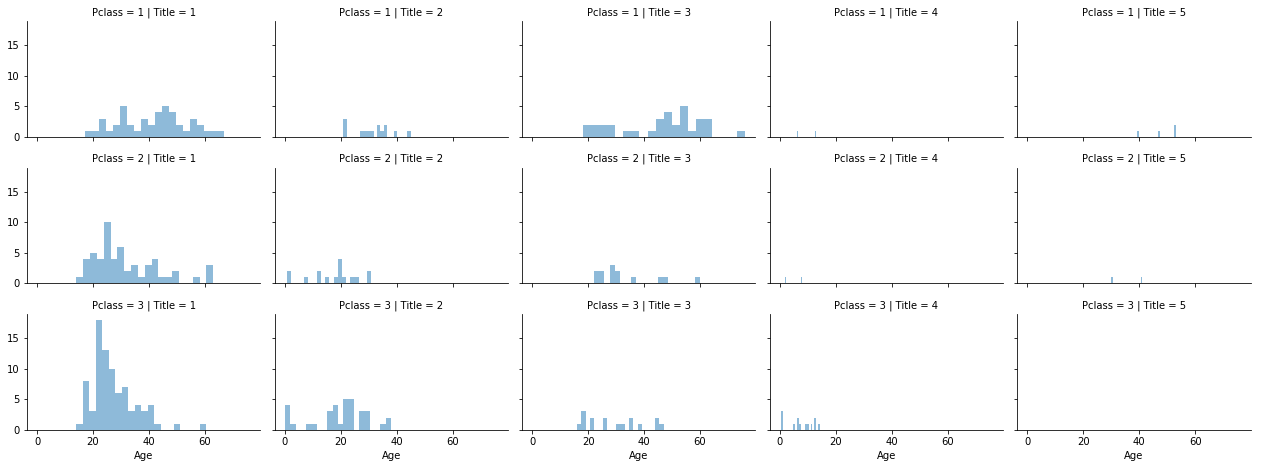

In [13]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(all_data, row='Pclass', col='Title', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [14]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [15]:
age_df = all_data[['Age','Pclass','Title','Fare']]
age_df = pd.get_dummies(age_df)

In [16]:
known_age = age_df[age_df.Age.notnull()].values
unknown_age = age_df[age_df.Age.isnull()].values
known_age

array([[34.5,  3. ,  1. ,  0. ],
       [47. ,  3. ,  3. ,  0. ],
       [62. ,  2. ,  1. ,  0. ],
       ...,
       [28. ,  3. ,  2. ,  0. ],
       [39. ,  1. ,  5. ,  3. ],
       [38.5,  3. ,  1. ,  0. ]])

In [17]:
from sklearn.ensemble import RandomForestRegressor
# y = known_age[:,0]
# X = known_age[:,1:]
# agerfr = RandomForestRegressor(random_state=0,n_estimators=100,n_jobs=-1)
# agerfr.fit(X,y)

import joblib
#joblib.dump(agerfr, 'agerfr.pkl')
agerfr = joblib.load('agerfr.pkl')

predictedAge = agerfr.predict(unknown_age[:,1::])
all_data.loc[(all_data.Age.isnull()) ,'Age'] = predictedAge

In [18]:
#mport pickle
#s=pickle.dumps(pipeline)
#import joblib
#joblib.dump(agerfr, 'agerfr.pkl')
#clf3 = joblib.load('pipline.pkl')
#print(clf3.predict(X[0:1]))  # 输出[0]

In [19]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Desk'] = all_data['Cabin'].str.get(0)

In [20]:
all_data['AgeBand'] = pd.cut(all_data['Age'], 5)

In [21]:
all_data.loc[ all_data['Age'] <= 16, 'Age'] = 0
all_data.loc[(all_data['Age'] > 16) & (all_data['Age'] <= 32), 'Age'] = 1
all_data.loc[(all_data['Age'] > 32) & (all_data['Age'] <= 48), 'Age'] = 2
all_data.loc[(all_data['Age'] > 48) & (all_data['Age'] <= 64), 'Age'] = 3
all_data.loc[ all_data['Age'] > 64, 'Age']
all_data = all_data.drop(['AgeBand'], axis=1)
all_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Desk
0,892,3,male,2.0,0,0,330911,0,Unknown,Q,1,U
1,893,3,female,2.0,1,0,363272,0,Unknown,S,3,U
2,894,2,male,3.0,0,0,240276,0,Unknown,Q,1,U
3,895,3,male,1.0,0,0,315154,0,Unknown,S,1,U
4,896,3,female,1.0,1,1,3101298,2,Unknown,S,3,U


In [22]:
freq_port = all_data.Embarked.dropna().mode()[0]
all_data['Embarked'] = all_data['Embarked'].fillna(freq_port)

In [23]:
all_data['Sex'] = all_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
all_data['Embarked'] = all_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
all_data['Desk'] = all_data['Desk'].map( {'T':0,'U': 1, 'G': 2, 'A': 3,'C':4,'F':5,'D':6,'B':7,'E':8} ).astype(int)

famliysize

In [24]:
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1
all_data['Family'] = 0
all_data.loc[((all_data['FamilySize']>4) & (all_data['FamilySize']<=7))| (all_data['FamilySize'] == 1) , 'Family'] = 0
all_data.loc[all_data['FamilySize'] >7 , 'Family'] = 2
all_data = all_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

<AxesSubplot:>

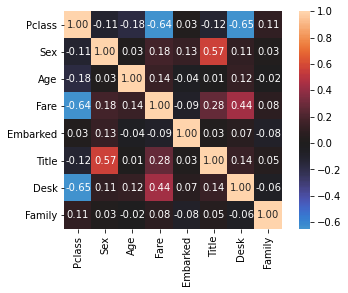

In [25]:
dftr2=all_data.drop('PassengerId',axis=1)
cor=dftr2.corr()
# 属性间相关系数热力图
sns.heatmap(cor, 
cbar=True, annot=True, # 注入数字
                 square=True, # 单元格为正方形
                 fmt='.2f',   # 字符串格式代码
                  annot_kws={'size': 10}, # 当annot为True时，ax.text的关键字参数，即注入数字的字体大小
           center=0)

In [26]:
all_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
Desk           0
Family         0
dtype: int64

In [27]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')
all_data=all_data.drop(['Ticket','Cabin'], axis=1)

In [28]:
#只取4个关键特征
#all_data['Embarked'] = all_data['Embarked'].fillna('C')
#all_data=all_data.drop(['Embarked','Desk','Family'],axis=1)

In [29]:
all_data.to_csv('newdf.csv')
#all_data.to_csv('dfless.csv')
all_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Desk,Family
0,892,3,0,2.0,0,2,1,1,0
1,893,3,1,2.0,0,0,3,1,0
2,894,2,0,3.0,0,2,1,1,0
3,895,3,0,1.0,0,0,1,1,0
4,896,3,1,1.0,2,0,3,1,0
